In [79]:
from nn_utils import *
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns

Read dataset using np.load

In [80]:
X_train = np.load("dataset_final/X_train.npy").T
y_train = np.load("dataset_final/y_train.npy").T

X_val = np.load("dataset_final/X_val.npy").T
y_val = np.load("dataset_final/y_val.npy").T

X_test = np.load("dataset_final/X_test.npy").T
y_test = np.load("dataset_final/y_test.npy").T

In [81]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (900, 60)
y_train shape: (5, 60)
X_val shape: (900, 7)
y_val shape: (5, 7)
X_test shape: (900, 8)
y_test shape: (5, 8)


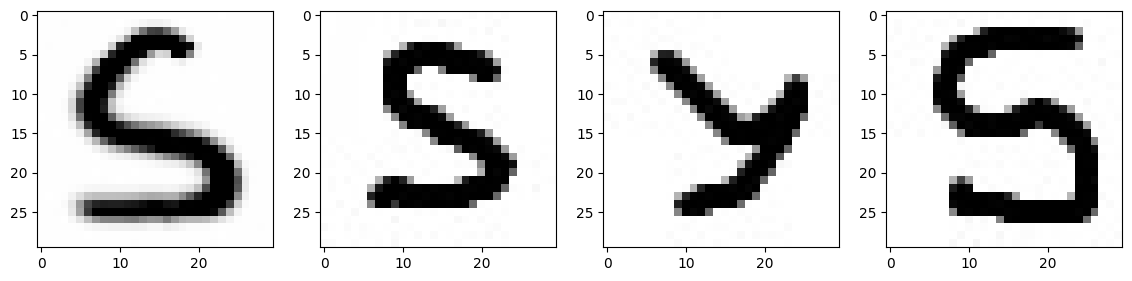

In [82]:
num_images_to_display = 4
num_cols = num_images_to_display
num_rows = 1
pixel = int(np.sqrt(X_train.shape[0]))

plt.figure(figsize=(14, 6)) 

for i in range(num_images_to_display):
    index = random.randrange(0, X_train.shape[1])
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[:, index].reshape(pixel, pixel), cmap='gray')

plt.show()

Define layer dimensions and hyper parameters

In [83]:
layers_dims = (int(X_train.shape[0]), 512, 256, 128, int(y_train.shape[0]))
lr = 0.013
epoch = 2500

epoch: 50 -- training cost: 1.5767 -- validation cost: 1.5748
epoch: 100 -- training cost: 1.3957 -- validation cost: 1.3671
epoch: 150 -- training cost: 0.8545 -- validation cost: 0.7306
epoch: 200 -- training cost: 0.5214 -- validation cost: 0.4031
epoch: 250 -- training cost: 0.377 -- validation cost: 0.2825
epoch: 300 -- training cost: 1.8525 -- validation cost: 1.7042
epoch: 350 -- training cost: 0.1593 -- validation cost: 0.1064
epoch: 400 -- training cost: 0.1196 -- validation cost: 0.0889
epoch: 450 -- training cost: 0.0736 -- validation cost: 0.0585
epoch: 500 -- training cost: 0.0515 -- validation cost: 0.0449
epoch: 550 -- training cost: 0.0388 -- validation cost: 0.0362
epoch: 600 -- training cost: 0.0309 -- validation cost: 0.03
epoch: 650 -- training cost: 0.0252 -- validation cost: 0.0254
epoch: 700 -- training cost: 0.0213 -- validation cost: 0.0222
epoch: 750 -- training cost: 0.0183 -- validation cost: 0.0198
epoch: 800 -- training cost: 0.0162 -- validation cost: 0.0

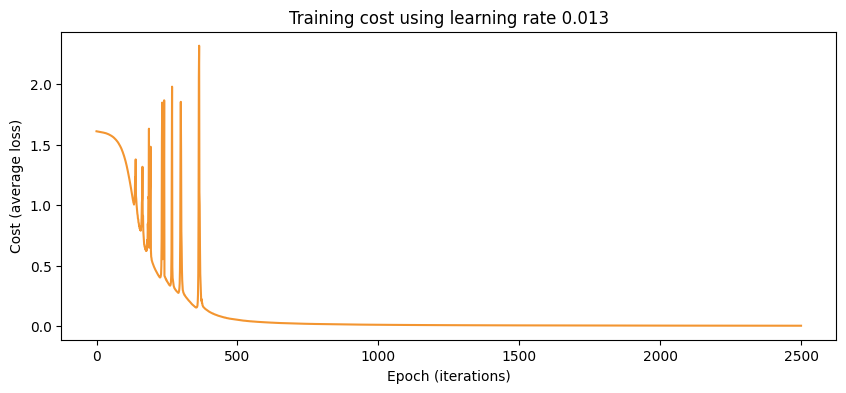

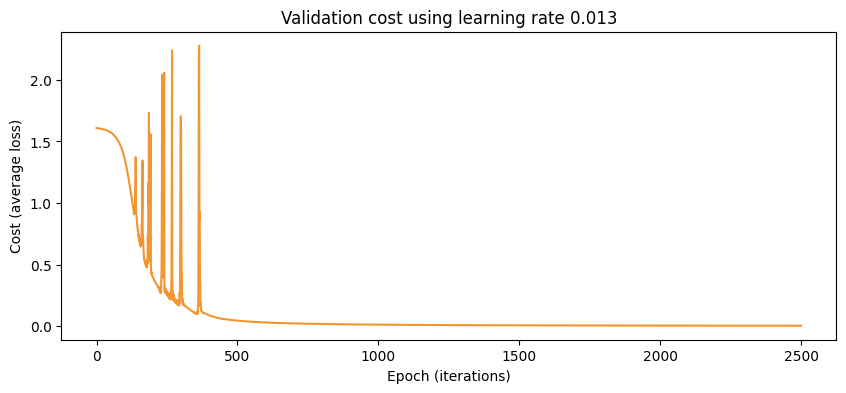

In [84]:
model = create_model(X_train, X_test, y_train, y_test, layers_dims, epochs=epoch, learning_rate=lr)

Get prediction accuracy

In [85]:
def accuracy(inp, labels, parameters):
    aL, _ = forward_propagation(inp, parameters)
    a_out = aL
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100

    return acc

In [86]:
train_acc = "\033[94m" # Blue color
val_acc = "\033[92m"  # Green color
test_acc = "\033[93m" # Yellow color
reset_color = "\033[0m"  # Reset color to default

print(f"Train Accuracy: {train_acc}{accuracy(X_train, y_train, model)} %{reset_color}")
print(f"Validation Accuracy: {val_acc}{round(accuracy(X_val, y_val, model), 2)} %{reset_color}")
print(f"Test Accuracy: {test_acc}{round(accuracy(X_test, y_test, model), 2)} %{reset_color}")

Train Accuracy: 100.0 %
Validation Accuracy: 100.0 %
Test Accuracy: 100.0 %


Plot confusion matrix

In [87]:
def plot_confusion_matrix(inp, labels, parameters, color):
    aL, _ = forward_propagation(inp, parameters)
    a_out = aL
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)

    # create confusion matrix
    cm = confusion_matrix(y_true=labels, y_pred=a_out)
 
    # display the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap=color, cbar=False)

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Plot confusion matrix for training set

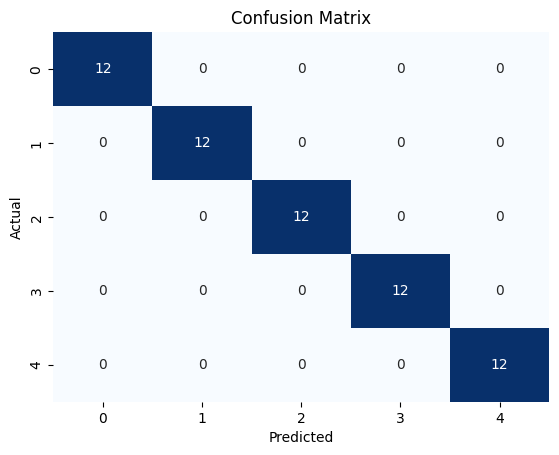

In [88]:
plot_confusion_matrix(X_train, y_train, model, "Blues")

Plot confusion matrix for validation data

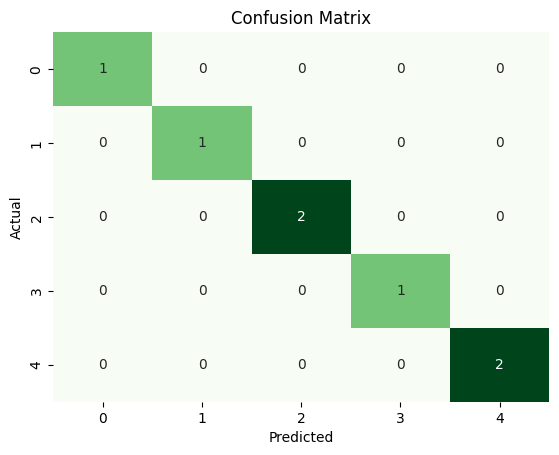

In [89]:
plot_confusion_matrix(X_val, y_val, model, "Greens")

Plot confusion matrix for test data

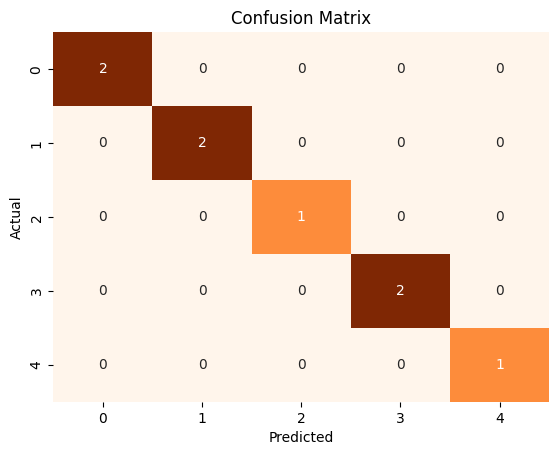

In [90]:
plot_confusion_matrix(X_test, y_test, model, "Oranges")

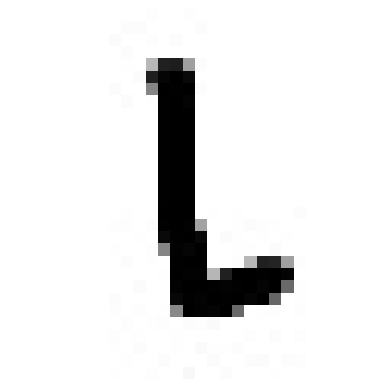

Label: L


In [91]:
label_dict = {
    0: "S",
    1: "I",
    2: "L",
    3: "Y",
    4: "T"
}

label_color = "\033[93m"  # Blue color
reset_color = "\033[0m"  # Reset color to default

idx = int(random.randrange(0, X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((30, 30)), cmap='gray')
plt.axis('off')
plt.show()

label = predict(X_test[:, idx], model)
print(f"Label: {label_color}{label_dict[label]}{reset_color}")